# Zufallszahlen
Ein wichtiges Einsatzgebiet mathematischer Programmierung ist die Simulation von Zufallsexperimenten. Dies ist beispielsweise essentiell für Versicherungsunternehmen, die das Risiko, das in ihrem Versicherungsbestand steckt, bestimmen müssen. 

## Würfeln, random.randint
Was ist die Wahrscheinlichkeit mit zwei 6-seitigen Würfel insgesamt mindestens eine Augenzahl von 10 zu erhalten? Ich bin mir sicher, Sie können das ausrechnen -- wir sind aber faul und lassen den Computer einfach 100000-mal würfeln.

Zufallszahlen werden mit dem Paket <code>random</code> erzeugt. Dort werden verschiedene Zufallsmethoden bereit gestellt. Die Funktion <code>random.random()</code> zB erzeugt gleichverteilt einen Zufallswert aus dem Interval $[0,1]$. Wir benötigen hier aber gleichverteilte ganze Zahlen -- die liefert die Methode <code>random.randint(a,b)</code>, die eine Zahlen $a,a+1,...,b$ ausgibt. Weitere Informationen zum Paket <code>random</code> gibt's [hier.](https://docs.python.org/3/library/random.html)

Wir erzeugen nun 100000-mal zwei Zufallszahlen in $1,...,6$ und zählen wie oft die Summe 10 oder mehr ergibt.

In [1]:
import random  # wir müssen einmal das Paket random laden

N=100000
count=0
for _ in range(N): # dies sieht merkwürdig aus, ist es aber nicht: _ ist ein gültiger Variablenname, signalisiert aber, dass uns die Variable nicht interessiert
    dice_sum=random.randint(1,6)+random.randint(1,6)
    if dice_sum>=10:
        count=count+1

frequency=count/N*100 # *100, weil wir Prozent ausgeben

print("10 oder mehr: {:.2f}%".format(frequency))  # {:.2f} macht, dass frequency mit zwei Nachkommastellen ausgeben wird

10 oder mehr: 16.64%


Natürlich lässt sich die theoretische Wahrscheinlichkeit auch leicht explizit bestimmen. 

### Aufgabe: Vier- gegen Zwölfseiter

<center>
    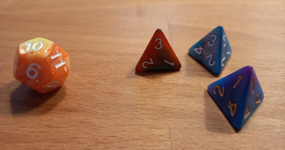
</center>

Alberta würfelt mit Bernd um die Wette. Alberta wirft drei vierseitige Würfel, Bernd einen zwölfseitigen Würfel. Es gewinnt, wer auch immer die höhere Augensumme hat. Wie oft gewinnt Alberta? Simulieren Sie 100000 solcher Würfelwürfe, zählen Sie wie oft Alberta gewinnt und speichern Sie die Gewinnrate von Alberta **in Prozent** in der Variable <code>frequency</code>.

In [2]:
### BEGIN SOLUTION

### END SOLUTION

print("Alberta gewinnt in {:.2f}% der Fälle".format(frequency))

Alberta gewinnt in 54.04% der Fälle


In [3]:
### Dies ist eine TESTZELLE. 
### Wenn die Ausführung zu einem Fehler führt, haben Sie etwas falsch gemacht
### Wenn bei Ausführung nichts passiert, dann ist Ihre Lösung richtig oder zumindest nicht grob falsch
assert frequency>50

## Poker und sample
Wie wahrscheinlich ist es beim Poker vier Asse zu ziehen? Wenn Sie elementare Wahrscheinlichkeitstheorie lernen, müssen Sie ziemlich sicher die Wahrscheinlichkeit verschiedener Pokerblätter ausrechnen. Das lassen wir mal, und simulieren lieber das Ziehen einer Pokerhand. 

<center>
    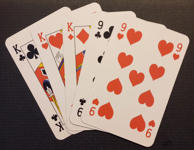
</center>

Wir gehen von einem Blatt mit 52 Karten aus, dh, wir haben die Kartenwerte 2,...,10, Bube, Dame, König und As und das ganze in vier Farben. Wir stellen jede Karte als ein Tupel <code>(farbe,wert)</code> dar. Die runden Klammern machen aus dem Paar ein <code>tuple</code> -- das verhält sich fast so wie eine Liste (mit eckigen Klammern), mit einem Unterschied: Das Tupel lässt sich nicht mehr ändern, dh, wir können nicht einfach die Farbe austauschen und wir können aus einem 2er-Tupel kein 3er-Tupel machen. Alle möglichen Karten fassen wir in <code>stapel</code> zusammen. Schließlich überprüfen wir noch, dass wir tatsächlich 52 Karten haben.

In [4]:
kartenwerte=['2','3','4','5','6','7','8','9','10','B','D','K','A']
farben=['Kreuz','Pik','Herz','Karo']
stapel=[(f,k) for f in farben for k in kartenwerte]
len(stapel)

52

Wir ziehen wir nun daraus eine Pokerhand von fünf Karten? Mit <code>random.sample(stapel,5)</code>. (<code>sample</code> führt Ziehen ohne Zurücklegen aus.)

In [5]:
hand=random.sample(stapel,5)
hand

[('Kreuz', '6'), ('Karo', '3'), ('Pik', 'A'), ('Herz', '7'), ('Karo', 'B')]

Damit die Hand ein wenig übersichtlicher wird, sortieren wir sie.

In [6]:
hand=sorted(hand)
hand

[('Herz', '7'), ('Karo', '3'), ('Karo', 'B'), ('Kreuz', '6'), ('Pik', 'A')]

Wenn Sie genau hingucken, werden Sie feststellen, dass hier *lexikographisch* sortiert wurde, dh, erst nach dem ersten Argument, der Farbe, und dann nach dem zweite Argument, dem Wert.

Wie erkennen wir nun, ob es sich um vier Asse handelt? Wegen der Sortierung müssen dann alle Karten bis auf die erste oder bis auf die letze ein As sein. Dafür müssen wir in der Liste von Tupel auf die jeweils zweiten Elemente der Karten zurgreifen. Das geschieht mittels wiederholte eckiger Klammern. (Ja, das sieht häßlich aus. Wenn Sie das stört, keine Sorge, das Paket für wissenschaftliches Rechnen, <code>numpy</code>, hat eine schönere Lösung gefunden.)

In [7]:
if (hand[0][1]=='As') and (hand[1][1]=='As') and (hand[2][1]=='As') and (hand[3][1]=='As'):
    print("Vier Asse!")
elif (hand[1][1]=='As') and (hand[2][1]=='As') and (hand[3][1]=='As') and (hand[4][1]=='As'):
    print("Vier Asse!")
else:
    print("Hah, keine vier Asse!")

Hah, keine vier Asse!


(Ja, das kann man auch eleganter lösen. Reicht aber für unsere Zwecke.)

### Aufgabe: Full house
Simulieren Sie 100000 Pokerhände und erfassen Sie den Anteil der full house-Hände in Prozent in der Variable <code>frequency</code>. Was ist ein full house? Drei Karten von einem Wert und ein Pärchen, also etwa Pik 4, Herz 4, Karo 4, Kreuz Bube, Karo Bube. [Hier](https://en.wikipedia.org/wiki/List_of_poker_hands) ist eine Liste. Ein Tipp: Da hier die Farben keine Rolle spielen, sollten Sie die Werte der Hand extrahieren (mit einer *list comprehension*). Sortieren nicht vergessen!

In [8]:
### BEGIN SOLUTION

### END SOLUTION

print("Vorkommen full house: {:.2f}%".format(frequency))

Vorkommen full house: 0.14%


In [9]:
### Dies ist eine TESTZELLE. 
### Wenn die Ausführung zu einem Fehler führt, haben Sie etwas falsch gemacht
### Wenn bei Ausführung nichts passiert, dann ist Ihre Lösung richtig oder zumindest nicht grob falsch
assert frequency>0.01

## Ziegen und choice
Kennen Sie das Ziegenproblem? In einer amerikanischen game show gab es ein Auto zu gewinnen. Der oder die Kandidat:in musste dafür eine von drei (verschlossenen) Türen auswählen -- hinter einer verbarg sich der Preis, das Auto, hinter den zwei anderen Ziegen (keine Ahnung, ob man die auch mitnehmen durfte). Der Kniff nun: nach Wahl einer Tür öffnete der *game show host* eine der Türen zu einer Ziege, wobei nie die gewählte Tür geöffnet wurde. An diesem Punkt hatte der oder die Kandidat:in die Möglichkeit noch einmal die Tür zu wechseln. Was ist nun besser? Bei der ursprünglichen Tür bleiben oder wechseln? 

<center>
    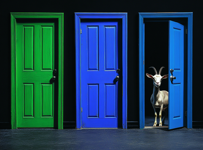
</center>

Nach einem Zeitungsartikel entspann sich offenbar eine heftige Diskussion, welches die bessere Strategie ist und wie hoch die Gewinnwahrscheinlichkeit der Wechselstrategie ist. (Wenn nicht gewechselt wird, ist die Wahrscheinlichkeit ganz offensichtlich 1/3.) Wir werden die Frage ganz einfach per Simulation beantworten.

Wie simulieren wir die Tür mit dem Gewinn? Einfach: wir ziehen zufällig und gleichverteilt eine der Zahlen 0,1,2. Ebenso wählen wir die ursprünglich von dem/der Kandidat:in gewählte Tür.

In [10]:
winning_door=random.randint(0,2)
chosen_door=random.randint(0,2)

Im nächsten Schritt wird dann eine Tür geöffnet -- das soll aber weder die Tür mit dem Preis noch die gewählte Tür sein. Dies können wir zB realisieren, indem wir aus der Liste aller Türen, die löschen, die nicht geöffnet werden dürfen.

In [11]:
doors_to_open=[d for d in range(3) if (d!=winning_door) and (d!=chosen_door)]
doors_to_open

[1]

Je nachdem ob die gewählte Tür zum Preis führt oder nicht, hat die Liste <code>doors_to_open</code> zwei oder ein Element. Wir wollen zufällig aus dieser Liste auswählen. (Wenn überhaupt die Wahl zwischen zwei Türen besteht.) Dies geht mit <code>random.choice</code>.

In [12]:
a_list=['car','goat','elephant','bicycle']
random.choice(a_list)

'bicycle'

### Aufgabe: Ziegen
Simulieren Sie 100000-mal das Ziegenproblem. Bei jedem Durchlauf zählen Sie, ob der Preis gewonnen wird, wenn nicht gewechselt wird und wenn gewechselt wird. Halten Sie den Anteile der Gewinne **in Prozent** mit Wechseln in der Variable <code>frequency_change</code> fest und den Anteil der Gewinne ohne Wechseln in der Variable <code>frequency_no_change</code>.

In [13]:
### BEGIN SOLUTION

### END SOLUTION

print("Gewinn ohne Türänderung: {:.2f}% der Fälle".format(frequency_no_change))
print("Gewinn mit Türänderung : {:.2f}% der Fälle".format(frequency_change))

Gewinn ohne Türänderung: 33.22% der Fälle
Gewinn mit Türänderung : 66.78% der Fälle


In [14]:
### Dies ist eine TESTZELLE. 
### Wenn die Ausführung zu einem Fehler führt, haben Sie etwas falsch gemacht
### Wenn bei Ausführung nichts passiert, dann ist Ihre Lösung richtig oder zumindest nicht grob falsch
assert frequency_change>frequency_no_change
assert frequency_change>1

## Random walk
Was haben die Beispiele bisher gebracht? Ja, die Zufallsexperimente zu simulieren ist schnell gemacht, aber andererseits lassen die sich alle leicht theoretisch analysieren. In manchen Situationen ist das jedoch nicht mehr so einfach oder vielleicht sogar quasi unmöglich. Dann ist eine numerische Simulation plötzlich ungemein hilfreich. Wir schauen uns noch ein komplizierteres Szenario an. Das ist zwar nicht unmöglich zu analysieren, erfordert jedoch schon mehr Aufwand. 

Sie spielen um Geld an einem einarmigen Banditen. Sie starten mit 5€ und in jedem Zeitschritt können Sie gewinnen oder verlieren. Genauer in jedem Zeitschritt können Sie 1€ gewinnen oder verlieren, beides mit Wahrscheinlichkeit 50%. Sollte Ihr Kapital auf 0 sinken, müssen Sie aufhören. Wie groß ist die Wahrscheinlichkeit, dass Sie nach 200 Schritten keinen Verlust gemacht haben? Schauen wir uns so einen Verlauf einmal exemplarisch an.

Text(0, 0.5, 'Spielgeld')

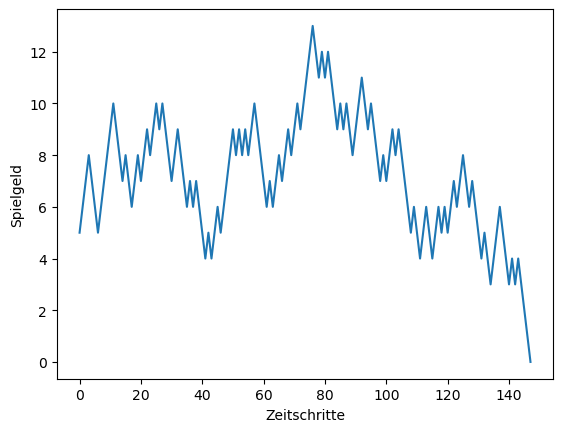

In [15]:
random.seed(27)  # Start für Zufallsgenerator, damit die Kurve unten bei Ihnen garantiert nicht trivial wird
walk=[5] # 5€ Startkapital
counter=0
while (walk[-1]>0) and counter<200: # wir machen höchstens 200 Schritt und stoppen, wenn das Geld alle ist
    walk.append(walk[-1]+2*random.randint(0,1)-1)
    counter=counter+1

## code zum plotten -- nicht so wichtig
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.plot(walk)
ax.set_xlabel("Zeitschritte")
ax.set_ylabel("Spielgeld")

Leider pleite. 

### Aufgabe: Glücksspiel
Simulieren Sie 10000 Glücksspiele mit jeweils 5€ Startkapital und höchstens 200 Schritten (oder bis das Geld alle ist) und zählen Sie wie oft am Ende kein Verlust gemacht wird (Kapital mindestens 5€). Erfassen Sie diesen Anteil **in Prozent** in der Variable <code>frequency</code>.

In [16]:
### BEGIN SOLUTION

### END SOLUTION

print("Anteil der Spiele ohne Verlust: {:.2f}%".format(frequency))

Anteil der Spiele ohne Verlust: 26.13%


In [17]:
### Dies ist eine TESTZELLE. 
### Wenn die Ausführung zu einem Fehler führt, haben Sie etwas falsch gemacht
### Wenn bei Ausführung nichts passiert, dann ist Ihre Lösung richtig oder zumindest nicht grob falsch
assert frequency>1
assert frequency<100

Wir haben hier nur einige der Methoden des Pakets <code>random</code> betrachtet. In den Paketen <code>numpy.random</code> ([link](https://numpy.org/doc/stable/reference/random/legacy.html#functions-in-numpy-random)) und <code>scipy.stats</code> ([link](https://docs.scipy.org/doc/scipy/reference/stats.html)) finden sich noch viele mehr.